In [36]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [37]:
def pca_transformation(data):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data)
    principal_df = pd.DataFrame(data = principal_components
             ,columns = ['principal component 1', 'principal component 2'])
    return principal_df

In [38]:

small_iris_data = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/small_iris.csv")
iris_data = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/iris.csv")
mall_customer_data = pd.read_csv("/Users/ahmadzarzar/Maskin_lärning_kurs/Deep lärning Linjär_reg/CSV/Mall_Customers.csv")


# Data analys 

Denna dataset innehåller 150 datapunkter och 2 attributer

In [39]:
small_iris_data.shape

(150, 2)


### ■ Innehåller datan konstiga värden?

Nej det finns inte som ni ser på visualiseringen nedan för dataset som vi jobbar med att det inte finns värde som sticker ut från de övriga de ser ganska ihopslagna ut. annars bör finnas några som sticker ut för att det ska finnas extremtvärde. 

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

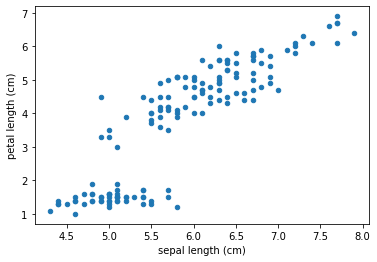

In [40]:
small_iris_data.plot.scatter(x="sepal length (cm)", y = "petal length (cm)")


array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'petal length (cm)'}>]], dtype=object)

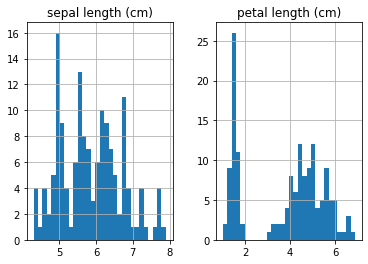

In [41]:
small_iris_data.hist(bins=30)


### ■ Ska några attribut plockas bort?

Nej det behövs inte därför att det finns bara attributer som vi kommer att behöva använda för vår data analys.


### ■ Behövs datan normaliseras?

Normalisering är en teknik som ofta används som en del av förberedelsen av data för maskininlärning. Målet med normaliseringen är att ändra värdena för numeriska kolumner i datauppsättningen så att de använder en gemensam skala,och för att vi inte har några data punkter som har mycket avstånd mellan varandra så det behövs inte heller här någon normalisering.

### Finns dubbletter?

In [42]:
print(f'***Small Iris***\n{small_iris_data.duplicated().value_counts()}')


***Small Iris***
False    123
True      27
dtype: int64


Däremot som vi ser att datan innehåller 27 dubbletter av 150 datapunkter

### Saknas värden?

In [43]:
print(f'***Small Iris***\n{small_iris_data.isna().sum()}')

***Small Iris***
sepal length (cm)    0
petal length (cm)    0
dtype: int64


Det saknas inte någon värde.

In [44]:
small_iris_data.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [45]:
class KMeans(object):
    def __init__(self, n_clusters=8, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def fit(self, X):
        if self.random_state:
            np.random.seed(self.random_state)
        initial = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.cluster_centers_ = X[initial]

        for _ in range(self.max_iter):
            self.labels_ = [self._nearest(self.cluster_centers_, x) for x in X]
            indices = [[i for i, l in enumerate(self.labels_) if l == j]
                        for j in range(self.n_clusters)]
            X_by_cluster = [X[i] for i in indices]
            # update the clusters
            self.cluster_centers_ = [c.sum(axis=0) / len(c) for c in X_by_cluster]
        # sum of square distances from the closest cluster
        self.inertia_ = sum(((self.cluster_centers_[l] - x)**2).sum()
                            for x, l in zip(X, self.labels_))
        return self

    def _nearest(self, clusters, x):
        return np.argmin([self._distance(x, c) for c in clusters])

    def _distance(self, a, b):
        return np.sqrt(((a - b)**2).sum())

    def predict(self, X):
        return self.labels_

    def transform(self, X):
        return [[self._distance(x, c) for c in self.cluster_centers_] for x in X]

    def fit_predict(self, X):
        return self.fit(X).predict(X)

    def fit_transform(self, X):
        return self.fit(X).transform(X)

    def score(self, X):
        return -self.inertia_

In [46]:
X_train = small_iris_data[['sepal length (cm)','petal length (cm)']]


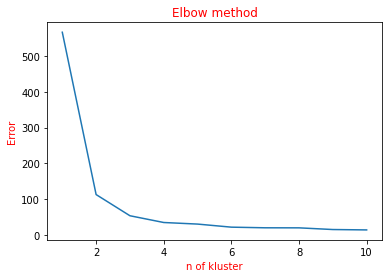

In [47]:
Erorr=[]
x = small_iris_data[['sepal length (cm)','petal length (cm)']]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(x.values)
    Erorr.append(kmeans.inertia_)
plt.plot(range(1,11),Erorr)  
plt.title('Elbow method',color='red')  
plt.xlabel('n of kluster',color='red')  
plt.ylabel('Error',color='red')  
plt.show()


Jag använde mig av metoden Elbow -metoden och den visade igen att det är 3 kluster som är lämligt
Diagrammet antyder att klustermängd två eller tre är de mest lämpade klustermängderna, enligt Elbow  Klustermängd tre väljs med motiveringen att det är den tydligaste knäpunkten och att tre kluster är ett lämpligt antal. Ett större antal kluster än tre skulle kunna uppfattas som mer svåruppfattat och rörigt och i värsta fall förvirra mer än vad det gör nytta, jag har nedan testat olika tal kluster men jag håller med Elbow -metoden att det är 3 kluster som passar bäst att dela på.

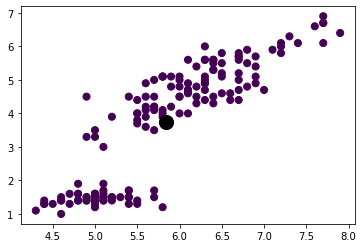

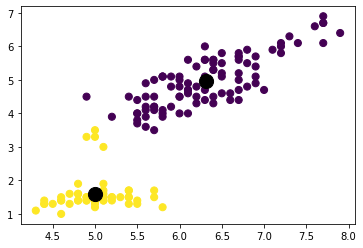

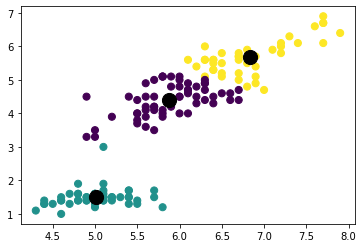

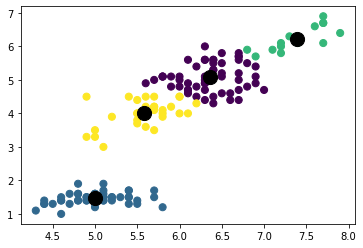

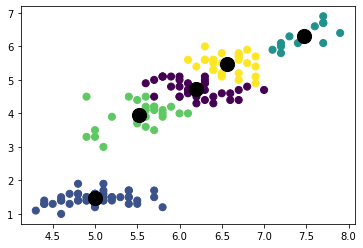

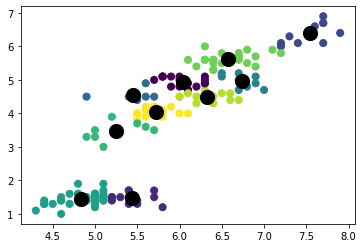

In [48]:
n_culster=[1,2,3,4,5,10]
x=X_train.values

for h in n_culster:
    kmeans = KMeans(n_clusters=h,random_state=42)
    kmeans.fit(x)
    y_kmeans = kmeans.predict(x)
    plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    for i in range(len(centers)):
        plt.scatter(centers[i][0], centers[i][1], s = 200, c = 'black', label = 'Centroids')
    plt.show()

# Väl godkänt:

# Data analys 

Iris_data innehåller 150 datapunkter och 4 attributer --------
Customer_data innehåller 200 datapunkter och 5 attributer

In [49]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [69]:
mall_customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [50]:
iris_data.shape

(150, 4)

In [51]:
mall_customer_data.shape



(200, 5)

In [52]:
print(f'***Iris***\n{iris_data.duplicated().value_counts()}')


***Iris***
False    149
True       1
dtype: int64


In [53]:
print(f'***Iris***\n{iris_data.isna().sum()}')

***Iris***
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [55]:
print(f'***Customer***\n{mall_customer_data.isna().sum()}')

***Customer***
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [70]:
print(f'***Customer***\n{mall_customer_data.duplicated().value_counts()}')

***Customer***
False    200
dtype: int64


In [56]:
d = {'Male': 0, 'Female': 1}
mall_customer_data['Gender'] = mall_customer_data['Gender'].map(d)


### Innehåller datan konstiga värden?


Nej det finns inte som ni ser på visualiseringen

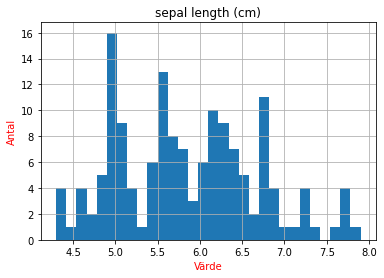

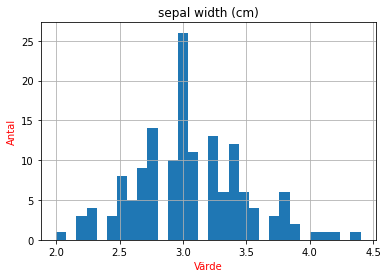

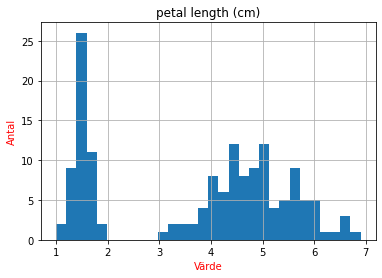

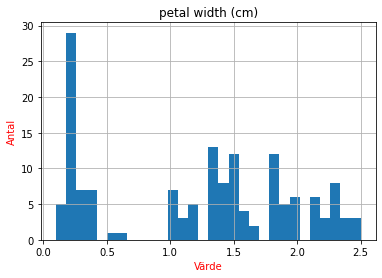

In [57]:
lista=[['sepal length (cm)'],['sepal width (cm)'],['petal length (cm)'],['petal width (cm)']]
for v in lista:
    iris_data[v].hist(bins=30)
    plt.xlabel('Värde',color='red')
    plt.ylabel('Antal',color='red')

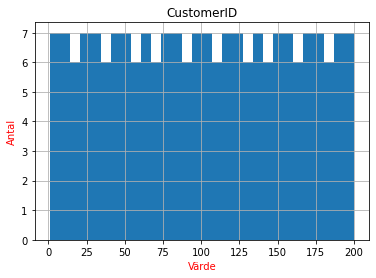

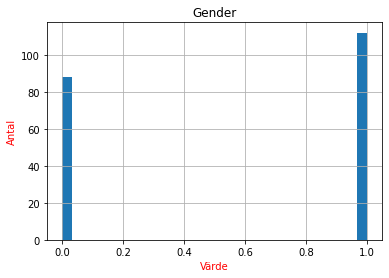

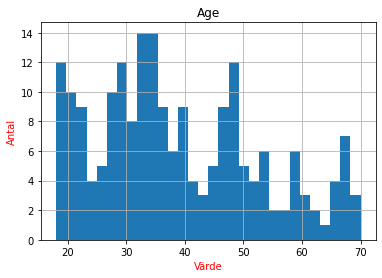

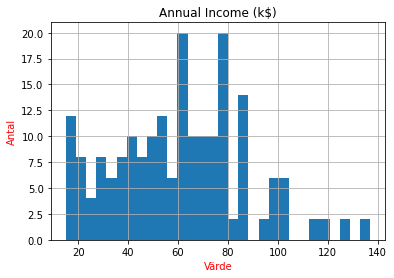

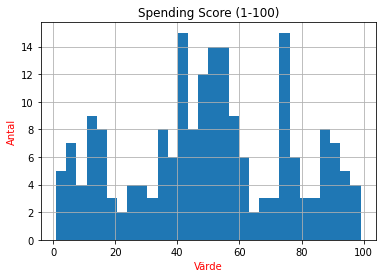

In [58]:
lis=[['CustomerID'],['Gender'],['Age'],['Annual Income (k$)'],['Spending Score (1-100)']]
for t in lis:
    mall_customer_data[t].hist(bins=30)
    plt.xlabel('Värde',color='red')
    plt.ylabel('Antal',color='red')
  

In [59]:

mall_customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [60]:
iris_data_trien = iris_data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]

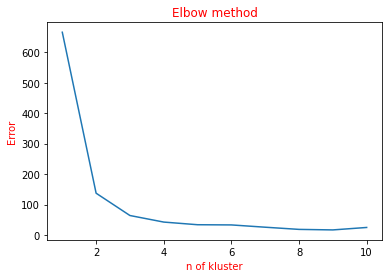

In [61]:
Erorr=[]
x = pca_transformation(iris_data_trien)
for i in range(1,11):
    kmeans= KMeans(n_clusters=i).fit(x.values)
    kmeans.fit(x.values)
    Erorr.append(kmeans.inertia_)
plt.plot(range(1,11),Erorr)  
plt.title('Elbow method',color='red')  
plt.xlabel('n of kluster',color='red')  
plt.ylabel('Error',color='red')  
plt.show()

Jag använde mig av metoden Elbow -metoden och den visade igen att det är 3 kluster som är lämligt
Diagrammet antyder att klustermängd två eller tre är de mest lämpade klustermängderna, enligt Elbow  Klustermängd tre väljs med motiveringen att det är den tydligaste knäpunkten och att tre kluster är ett lämpligt antal. Ett större antal kluster än tre skulle kunna uppfattas som mer svåruppfattat och rörigt och i värsta fall förvirra mer än vad det gör nytta, jag har nedan testat olika tal kluster men jag håller med Elbow -metoden att det är 3 kluster som passar bäst att dela på

In [62]:
def calc_centroids(clusters, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

### Träna K-Means 

### Rita ut klustrena

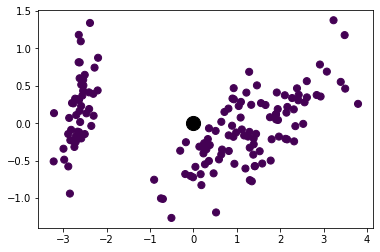

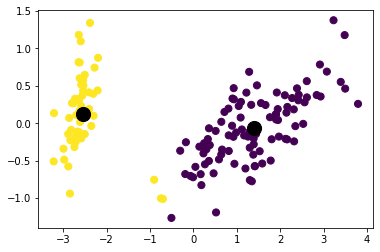

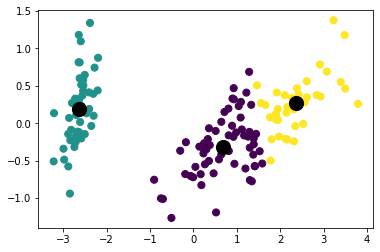

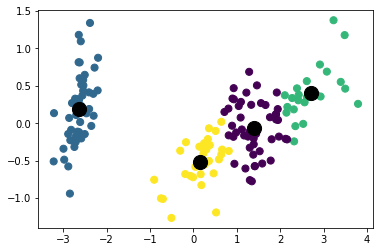

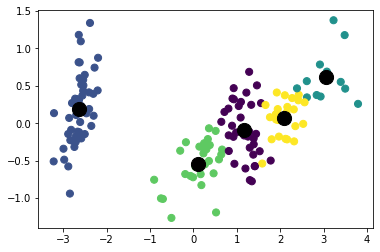

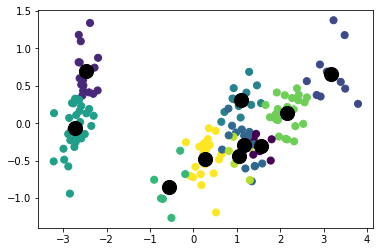

In [64]:
n_cluster=[1,2,3,4,5,10]
x_train = iris_data_trien.values

for h in n_cluster:
    kmeans = KMeans(n_clusters=h, random_state=42)
    kmeans.fit(x_train)
    
    trans = pca_transformation(iris_data_trien)
    x = trans.values
    
    y_kmeans = kmeans.predict(x)
   
    centroids = calc_centroids(y_kmeans, x)

    plt.scatter(x[:, 0], x[:, 1], c = y_kmeans, s=50, cmap='viridis')

    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black', s = 200)
    
    plt.show()


### Ska några attribut plockas bort?


Ja CustomerID attributen bör tas bort för ID  är ett attribut som inte har någon påverkan på datan som vi använder så om vi plockar bort det den kommer inte att göra vår data sämre.

In [65]:
mall_customer_data_trien = mall_customer_data[['CustomerID','Gender','Age','Annual Income (k$)','Spending Score (1-100)']].drop(columns=['CustomerID'])

### Behövs datan normaliseras?

Det beror på hur vi tänker alltså om att normalisera och att det behövs!!, ja det gör det för att kunna skapa bättre kluster, så därför valde jag att normalisera.

In [66]:
normalized = preprocessing.normalize(mall_customer_data)


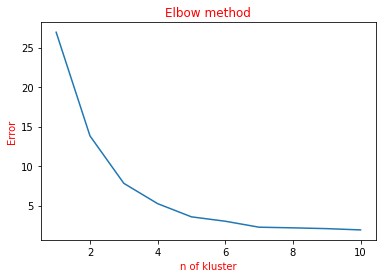

In [67]:
Erorr=[]
x = pca_transformation(normalized)
for i in range(1,11):
    kmeans= KMeans(n_clusters=i).fit(x.values)
    kmeans.fit(x.values)
    Erorr.append(kmeans.inertia_)
plt.plot(range(1,11),Erorr)  
plt.title('Elbow method',color='red')  
plt.xlabel('n of kluster',color='red')  
plt.ylabel('Error',color='red')  
plt.show()

Jag använde mig av metoden Elbow -metoden och den visade mer än ett alternativ och dessa är att dela 3,5,7 kluster som är lämligt
Diagrammet antyder att klustermängd tre, fem, eller sju är de mest lämpade klustermängderna, enligt Elbow  Klustermängd sju väljs med motiveringen att det är den tydligaste knäpunkten och att sju kluster är ett lämpligt antal. Ett större antal kluster än sju skulle kunna uppfattas som mer svåruppfattat och rörigt och i värsta fall förvirra mer än vad det gör nytta, jag har nedan testat olika tal kluster men jag håller inte med Elbow -metoden den här gången det är 5 kluster som passar bäst att dela på jag tycker att ser bätter ut när den visar sig på bilden.

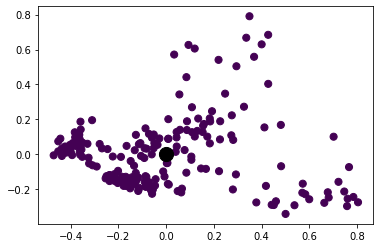

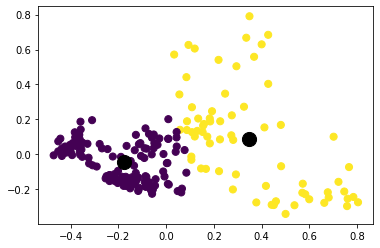

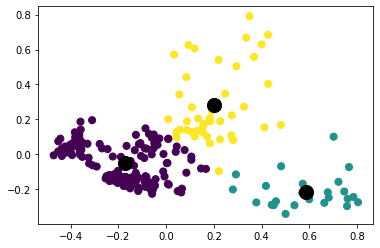

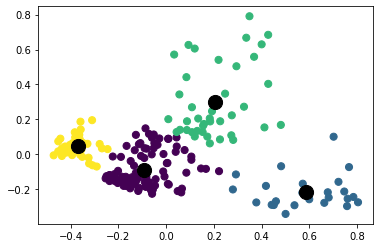

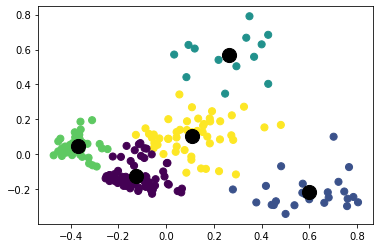

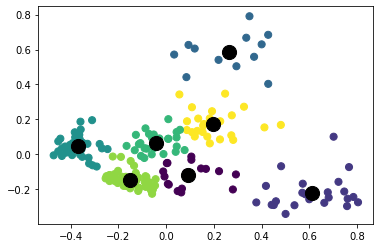

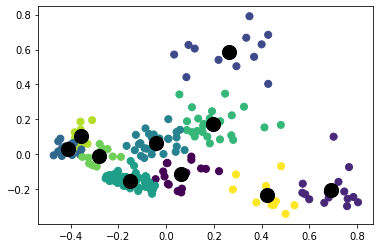

In [71]:
n_cluster=[1,2,3,4,5,7,10]
x_train = normalized

for h in n_cluster:
    kmeans = KMeans(n_clusters=h, random_state=42)
    kmeans.fit(x_train) 
    
    trans = pca_transformation(normalized)
    x = trans.values
    
    y_kmeans = kmeans.predict(x)
   
    centroids = calc_centroids(y_kmeans, x)

    plt.scatter(x[:, 0], x[:, 1], c = y_kmeans, s=50, cmap='viridis')

    plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], color='black', s = 200)
    
    plt.show()